In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [22]:
df_train=pd.read_csv('sales_train.csv')
df_test=pd.read_csv('test.csv')

In [23]:
filt=(df_train['item_price']<25000)
df_train=df_train[filt]

In [24]:
ft=(df_train['item_cnt_day']<35)
df_train=df_train[ft]

In [25]:
df_test['date_block_num']=34

In [6]:
df_test=df_test[['date_block_num','shop_id','item_id']]

In [7]:
df_train['date']= pd.to_datetime(df_train['date'],format='%d.%m.%Y')
df_train.set_index('date',inplace=True)

In [8]:
df_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.00,1.0
2013-01-03,0,25,2552,899.00,1.0
2013-01-05,0,25,2552,899.00,-1.0
2013-01-06,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


In [9]:
df_test.head()

,date_block_num,shop_id,item_id
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268


In [10]:
X = df_train[['date_block_num','shop_id','item_id']]
y =df_train['item_cnt_day']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state = 0,warm_start=True,verbose=2)
regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=2, warm_start=True)

In [32]:
Xx=df_test[['date_block_num','shop_id','item_id']]

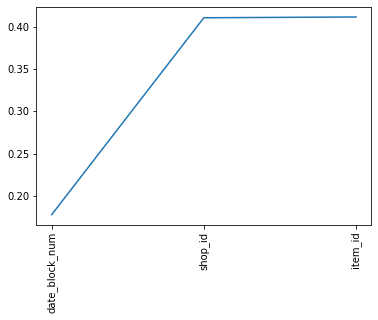

In [31]:
plt.plot(regressor.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

In [33]:
item_cnt_month= regressor.predict(Xx)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [20]:
df_test.head()

,date_block_num,shop_id,item_id
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268


In [34]:
output= pd.DataFrame({'ID': df_test.ID,'item_cnt_month': item_cnt_month})

In [36]:
output.head()

,ID,item_cnt_month
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [38]:
output['item_cnt_month'].round()

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        1.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        2.0
         ... 
214170    1.0
214171    1.0
214172    1.0
214173    1.0
214174    1.0
214175    1.0
214176    1.0
214177    1.0
214178    1.0
214179    1.0
214180    1.0
214181    1.0
214182    1.0
214183    1.0
214184    1.0
214185    1.0
214186    1.0
214187    1.0
214188    1.0
214189    1.0
214190    1.0
214191    1.0
214192    1.0
214193    1.0
214194    1.0
214195    1.0
214196    1.0
214197    1.0
214198    1.0
214199    1.0
Name: item_cnt_month, Length: 214200, dtype: float64

In [39]:
output.to_csv('submission11.csv', index=False)